<a href="https://colab.research.google.com/github/Rajguru183/Movies-Dataset-analysis/blob/main/DAV_ASSIGN_183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies.csv


In [ ]:
import pandas as pd

df = pd.read_csv("movies.csv")
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    0 non-null      float64
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 898.7+ KB


In [ ]:
# Converting 'score' to numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Filling missing values in the 'score' column with the mean of available scores
df['score'] = df['score'].fillna(df['score'].mean())

# Converting 'gross' and 'budget' to numeric values
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['gross'] = df['gross'].fillna(df['gross'].mean())  # Filling missing 'gross' with the mean

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].fillna(df['budget'].median())  # Filling missing 'budget' with the median

# Converting 'runtime' to numeric (if it's not already numeric)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Displaying some insights to check
print(df[['name', 'score', 'runtime', 'gross', 'budget']].head())

                                             name  score  runtime  \
0                                     The Shining    8.4    146.0   
1                                 The Blue Lagoon    5.8    104.0   
2  Star Wars: Episode V - The Empire Strikes Back    8.7    124.0   
3                                       Airplane!    7.7     88.0   
4                                      Caddyshack    7.3     98.0   

         gross      budget  
0   46998772.0  19000000.0  
1   58853106.0   4500000.0  
2  538375067.0  18000000.0  
3   83453539.0   3500000.0  
4   39846344.0   6000000.0  


In [ ]:
score = df['score'].values
runtime = pd.to_numeric(df['runtime'], errors='coerce').values

print("Score sample:", score[:5])
print("Runtime sample:", runtime[:5])



Score sample: [8.4 5.8 8.7 7.7 7.3]
Runtime sample: [146. 104. 124.  88.  98.]


In [ ]:
print("Original shape of runtime:", runtime.shape)


Original shape of runtime: (7668,)


Reshaping to 2D

In [ ]:
runtime_2d = runtime.reshape(-1, 1)
print("Shape after reshaping to column vector:", runtime_2d.shape)
print("First 5 rows:\n", runtime_2d[:5])


Shape after reshaping to column vector: (7668, 1)
First 5 rows:
 [[146.]
 [104.]
 [124.]
 [ 88.]
 [ 98.]]


Reshape to (rows, columns) format

In [ ]:
reshaped = runtime[:20].reshape(4, 5)  # First 20 values as 4 rows, 5 columns
print("Reshaped to (4,5):\n", reshaped)



Reshaped to (4,5):
 [[146. 104. 124.  88.  98.]
 [ 95. 133. 129. 127. 100.]
 [116. 109. 114. 124. 104.]
 [103. 134. 109.  89. 111.]]


 Flatten a 2D array back to 1D

In [ ]:
flattened = reshaped.flatten()
print("Flattened back to 1D:", flattened)


Flattened back to 1D: [146. 104. 124.  88.  98.  95. 133. 129. 127. 100. 116. 109. 114. 124.
 104. 103. 134. 109.  89. 111.]


In [ ]:
# Converting necessary columns to numeric where applicable
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

 **Concatenation using hstack and vstack**

In [ ]:
runtime_2d = runtime.reshape(-1, 1)
score_2d = pd.to_numeric(df['score'], errors='coerce').values.reshape(-1, 1)

# Horizontally concatenate score and runtime
combined = np.hstack((score_2d, runtime_2d))
print("Shape after hstack (side by side):", combined.shape)
print("First 5 rows:\n", combined[:5])

# Vertically stack first 5 of each
stacked = np.vstack((score_2d[:5], runtime_2d[:5]))
print("Vertically stacked (score + runtime):\n", stacked)


Shape after hstack (side by side): (7668, 2)
First 5 rows:
 [[  8.4 146. ]
 [  5.8 104. ]
 [  8.7 124. ]
 [  7.7  88. ]
 [  7.3  98. ]]
Vertically stacked (score + runtime):
 [[  8.4]
 [  5.8]
 [  8.7]
 [  7.7]
 [  7.3]
 [146. ]
 [104. ]
 [124. ]
 [ 88. ]
 [ 98. ]]


**Splitting**

In [ ]:
# Horizontal split (split columns)
split_ratings, split_time = np.hsplit(combined, 2)
print("Split Ratings (first 5):", split_ratings[:5])
print("Split Time Taken (first 5):", split_time[:5])

# Vertical split (split rows into 2 halves)
top, bottom = np.vsplit(combined[:10], 2)
print("Top half:\n", top)
print("Bottom half:\n", bottom)


Split Ratings (first 5): [[4.2]
 [4.7]
 [4.7]
 [4.3]
 [4.7]]
Split Time Taken (first 5): [[46.]
 [23.]
 [21.]
 [20.]
 [41.]]
Top half:
 [[ 4.2 46. ]
 [ 4.7 23. ]
 [ 4.7 21. ]
 [ 4.3 20. ]
 [ 4.7 41. ]]
Bottom half:
 [[ 4.5 20. ]
 [ 4.  33. ]
 [ 4.2 40. ]
 [ 4.9 41. ]
 [ 4.7 15. ]]


 Math operations on arrays

In [ ]:
# Assuming the necessary columns are already converted to numeric and missing values handled

# Square root of runtime
print("√ Runtime (first 5):", np.sqrt(df['runtime'][:5]))

# Exponent of ratings
print("exp(Ratings) (first 5):", np.exp(df['rating'][:5]))

# Log of (runtime + 1)
print("log(Runtime + 1):", np.log1p(df['runtime'][:5]))

# Absolute values (ratings)
print("Absolute Ratings (first 5):", np.abs(df['rating'][:5]))

# Trigonometric functions for ratings (just for demonstration)
print("sin(Ratings) (first 5):", np.sin(df['rating'][:5]))

# Round ratings to nearest integer
print("Rounded Ratings (first 5):", np.round(df['rating'][:5]))

# Ceiling and floor of ratings
print("Ceil Ratings (first 5):", np.ceil(df['rating'][:5]))
print("Floor Ratings (first 5):", np.floor(df['rating'][:5]))

# Check where runtime > 100
print("Runtime > 100 (first 5):", df['runtime'][:5] > 100)

# Additional operations on other columns:

# Square root of score
print("√ Score (first 5):", np.sqrt(df['score'][:5]))

# Exponent of budget
print("exp(Budget) (first 5):", np.exp(df['budget'][:5]))

# Log of (gross + 1)
print("log(Gross + 1):", np.log1p(df['gross'][:5]))

# Absolute value of votes
print("Absolute Votes (first 5):", np.abs(df['votes'][:5]))

# Trigonometric operations on budget
print("sin(Budget) (first 5):", np.sin(df['budget'][:5]))

# Round gross values
print("Rounded Gross (first 5):", np.round(df['gross'][:5]))

# Ceiling and floor of votes
print("Ceil Votes (first 5):", np.ceil(df['votes'][:5]))
print("Floor Votes (first 5):", np.floor(df['votes'][:5]))


√ Runtime (first 5): 0    12.083046
1    10.198039
2    11.135529
3     9.380832
4     9.899495
Name: runtime, dtype: float64
exp(Ratings) (first 5): 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
log(Runtime + 1): 0    4.990433
1    4.653960
2    4.828314
3    4.488636
4    4.595120
Name: runtime, dtype: float64
Absolute Ratings (first 5): 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
sin(Ratings) (first 5): 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
Rounded Ratings (first 5): 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
Ceil Ratings (first 5): 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
Floor Ratings (first 5): 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: rating, dtype: float64
Runtime > 100 (first 5): 0     True
1     True
2     True
3    False
4    False
Name: runtime, dtype: bool
√ Score (first 5): 0    2.898275
1    2.408319
2    2.949576
3    2.774887
4    2.7

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Aggregation functions**

In [ ]:
# Mean of Budget, Gross, and Runtime
print("Mean Budget:", np.nanmean(df['budget']))
print("Mean Gross:", np.nanmean(df['gross']))
print("Mean Runtime:", np.nanmean(df['runtime']))

# Max of Budget, Min of Rating
print("Max Budget:", np.nanmax(df['budget']))
print("Min Rating:", np.nanmin(df['rating']))

# Standard Deviation of Runtime and Variance of Rating
print("Standard Deviation (Runtime):", np.nanstd(df['runtime']))
print("Variance (Rating):", np.nanvar(df['rating']))

# Sum of Gross and Count of non-null Budget
print("Sum of Gross:", np.nansum(df['gross']))
print("Count of non-null Budget:", np.count_nonzero(~np.isnan(df['budget'])))


Mean Budget: 31317559.915362544
Mean Gross: 78500541.01778314
Mean Runtime: 107.2616127348643
Max Budget: 356000000.0
Min Rating: nan
Standard Deviation (Runtime): 18.5800350318082
Variance (Rating): nan
Sum of Gross: 601942148524.3611
Count of non-null Budget: 7668


<ipython-input-24-904f3d3bd585>:8: RuntimeWarning: All-NaN axis encountered
  print("Min Rating:", np.nanmin(df['rating']))
<ipython-input-24-904f3d3bd585>:12: RuntimeWarning: Degrees of freedom <= 0 for slice.
  print("Variance (Rating):", np.nanvar(df['rating']))


In [ ]:

# Replace NaN with 0 (or any other value you prefer) before computing mean
combined = np.nan_to_num(combined, nan=0)

# Column-wise Mean (Rating, Runtime)
print("Column-wise Mean (Rating, Runtime):", np.nanmean(combined, axis=0))

# Row-wise Sum
print("Row-wise Sum (first 5):", np.nansum(combined[:5], axis=1))


Column-wise Mean (Rating, Runtime): [  0.         107.20565989]
Row-wise Sum (first 5): [146. 104. 124.  88.  98.]


 Broadcasting

In [ ]:
# Adjustment array: Add 0.5 to ratings, 10 to time
adjustment = np.array([0.5, 10])

# Broadcast the addition to all rows of combined
broadcasted_result = combined[:5] + adjustment
print("Broadcasted addition (ratings+0.5, time+10):\n", broadcasted_result)

Broadcasted addition (ratings+0.5, time+10):
 [[  0.5 156. ]
 [  0.5 114. ]
 [  0.5 134. ]
 [  0.5  98. ]
 [  0.5 108. ]]


 Boolean Masking

In [ ]:
# Movies with rating > 4.5
high_rated = df['score'] > 4.5
print("High Rated Boolean Mask (first 10):", high_rated[:10])

# Movie names with rating > 4.5
print("Movies with rating > 4.5:\n", df['name'][high_rated])


High Rated Boolean Mask (first 10): 0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: score, dtype: bool
Movies with rating > 4.5:
 0                                          The Shining
1                                      The Blue Lagoon
2       Star Wars: Episode V - The Empire Strikes Back
3                                            Airplane!
4                                           Caddyshack
                             ...                      
7662                                     The Robinsons
7664                                       Dream Round
7665                                     Saving Mbango
7666                                      It's Just Us
7667                                         Tee em el
Name: name, Length: 7361, dtype: object


In [ ]:
# Movies with score > 4 AND runtime < 30
mask = (df['score'] > 4) & (df['runtime'] < 30)
print("Matching Movie Names:\n", df['name'][mask])
print("Matching Runtime:\n", df['runtime'][mask])


Matching Movie Names:
 Series([], Name: name, dtype: object)
Matching Runtime:
 Series([], Name: runtime, dtype: float64)


Fancy Indexing

In [ ]:
# Ratings at specific row indices
indices = [0, 2, 5, 9]
print("Movies at indices [0,2,5,9]:", df['name'][indices])

# Top 5 highest rated movies
top5_idx = np.argsort(df['score'])[-5:]
print("Top 5 Scores:", df['score'][top5_idx])
print("Runtime for Top 5 Scores:", df['runtime'][top5_idx])


Movies at indices [0,2,5,9]: 0                                       The Shining
2    Star Wars: Episode V - The Empire Strikes Back
5                                   Friday the 13th
9                                   The Long Riders
Name: name, dtype: object
Top 5 Scores: 4245    8.9
2444    8.9
2247    8.9
5243    9.0
2443    9.3
Name: score, dtype: float64
Runtime for Top 5 Scores: 4245    201.0
2444    154.0
2247    195.0
5243    152.0
2443    142.0
Name: runtime, dtype: float64


In [ ]:
# Remove NaNs from specific columns and use clean arrays
valid_mask = ~df['rating'].isna()
clean_ratings = df['rating'][valid_mask]
clean_scores = df['score'][valid_mask]
clean_runtime = df['runtime'][valid_mask]
print("Clean Ratings (no NaNs):", clean_ratings[:5])


Clean Ratings (no NaNs): Series([], Name: rating, dtype: float64)


sorting

In [ ]:
# Sort runtime (ascending)
sorted_runtime = np.sort(df['runtime'])
print("Sorted Runtime (Ascending):", sorted_runtime[:10])

# Sort scores (descending)
sorted_scores_desc = np.sort(df['score'])[::-1]
print("Sorted Scores (Descending):", sorted_scores_desc[:10])

# Get indices that would sort runtime
runtime_order = np.argsort(df['runtime'])
print("Indices that sort runtime:", runtime_order[:10])

# Use sorting indices to sort corresponding movie names
sorted_movies_by_runtime = df['name'].iloc[runtime_order]
print("Movies sorted by runtime:", sorted_movies_by_runtime[:10])


Sorted Runtime (Ascending): [55. 63. 69. 69. 71. 71. 72. 72. 72. 72.]
Sorted Scores (Descending): [9.3 9.  8.9 8.9 8.9 8.8 8.8 8.8 8.8 8.7]
Indices that sort runtime: 0     474
1    5983
2    3318
3    1271
4    4493
5    2381
6    4407
7    1184
8     834
9    2357
Name: runtime, dtype: int64
Movies sorted by runtime: 474      The Business of Show Business
5983               Season of the Witch
3318                         Following
1271              The Land Before Time
4493                           9 Songs
2381                Once Upon a Forest
4407                 The Jungle Book 2
1184                       Creepozoids
834              Here Come the Littles
2357    We're Back! A Dinosaur's Story
Name: name, dtype: object


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


# **PANDAS OPERATIONS**

**Series**

In [ ]:
# Series from numeric column
rating_series = df['score']
print("Rating Series:\n", rating_series.head())

# Series from float column
score_series = df['score']
print("\nScore Series:\n", score_series.head())

# Series from categorical column
genre_series = df['genre']
print("\nGenre Series:\n", genre_series.head())

released_series = df['released'].str.contains('1980')  # Example for boolean filter based on the year
print("\nReleased Series:\n", released_series.head())


Rating Series:
 0    8.4
1    5.8
2    8.7
3    7.7
4    7.3
Name: score, dtype: float64

Score Series:
 0    8.4
1    5.8
2    8.7
3    7.7
4    7.3
Name: score, dtype: float64

Genre Series:
 0        Drama
1    Adventure
2       Action
3       Comedy
4       Comedy
Name: genre, dtype: object

Released Series:
 0    True
1    True
2    True
3    True
4    True
Name: released, dtype: object


Custom Index Series

In [ ]:
# Ratings with movie name as index
ratings_with_name = pd.Series(df['score'].values, index=df['name'])
print("\nCustom Indexed Series (Ratings by Movie Name):\n", ratings_with_name.head())



Custom Indexed Series (Ratings by Movie Name):
 name
The Shining                                       8.4
The Blue Lagoon                                   5.8
Star Wars: Episode V - The Empire Strikes Back    8.7
Airplane!                                         7.7
Caddyshack                                        7.3
dtype: float64


In [ ]:
# Score with movie name as index
scores_with_name = pd.Series(df['score'].values, index=df['name'])
print("\nCustom Indexed Series (Scores by Movie Name):\n", scores_with_name.head())

# Series Properties
print("Mean Runtime (excluding nulls):", df['runtime'].mean())
print("Max Score:", df['score'].max())
print("Unique Countries:\n", df['country'].unique())
print("Genre value counts:\n", df['genre'].value_counts())



Custom Indexed Series (Scores by Movie Name):
 name
The Shining                                       8.4
The Blue Lagoon                                   5.8
Star Wars: Episode V - The Empire Strikes Back    8.7
Airplane!                                         7.7
Caddyshack                                        7.3
dtype: float64
Mean Runtime (excluding nulls): 107.2616127348643
Max Score: 9.3
Unique Countries:
 ['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Libya' 'Italy' 'Soviet Union' 'France' 'Hong Kong'
 'South Korea' 'Sweden' 'Spain' 'Mexico' 'Switzerland' 'Netherlands'
 'New Zealand' 'Philippines' 'Israel' 'Japan' 'Hungary' 'Brazil'
 'Yugoslavia' 'Argentina' 'Taiwan' 'Ireland' 'Denmark' 'Germany' 'Iran'
 'China' 'Belgium' 'Austria' 'Portugal' 'Vietnam' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Greece' 'Czech Republic'
 'Norway' 'India' 'Jamaica' 'Aruba' 'Thailand' 'Colombia' 'Romania' nan
 'United Arab Emira

**DataFrame**

In [ ]:
print("Shape of DataFrame (rows, columns):", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types of Columns:\n", df.dtypes)


Shape of DataFrame (rows, columns): (7668, 15)

Column Names:
 Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

Data Types of Columns:
 name         object
rating      float64
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
print("First Row:\n", df.iloc[0])
print("\nRow with index 10:\n", df.iloc[10])

selected = df[['name', 'country', 'released', 'genre']]
print("Selected Columns:\n", selected.head())



First Row:
 name                          The Shining
rating                                NaN
genre                               Drama
year                                 1980
released    June 13, 1980 (United States)
score                                 8.4
votes                            927000.0
director                  Stanley Kubrick
writer                       Stephen King
star                       Jack Nicholson
country                    United Kingdom
budget                         19000000.0
gross                          46998772.0
company                      Warner Bros.
runtime                             146.0
Name: 0, dtype: object

Row with index 10:
 name                    Any Which Way You Can
rating                                    NaN
genre                                  Action
year                                     1980
released    December 17, 1980 (United States)
score                                     6.1
votes                                 

In [ ]:
# Single column as a Series
print(df['score'].head())
print()

# Multiple columns as a DataFrame
print(df[['score', 'gross', 'country']].head())
print()

# Access row by label-based indexing (for row label/index)
print(df.loc[0])     # First row

print()
# Access row by integer position
print(df.iloc[2])    # Third row

print()

# Using .loc[row_label, column_label]
print(df.loc[0, 'country'])
print()

# Using .iloc[row_position, column_position]
print(df.iloc[4, 10])   # For example, 5th row, 11th column (like budget)


0    8.4
1    5.8
2    8.7
3    7.7
4    7.3
Name: score, dtype: float64

   score        gross         country
0    8.4   46998772.0  United Kingdom
1    5.8   58853106.0   United States
2    8.7  538375067.0   United States
3    7.7   83453539.0   United States
4    7.3   39846344.0   United States

name                          The Shining
rating                                NaN
genre                               Drama
year                                 1980
released    June 13, 1980 (United States)
score                                 8.4
votes                            927000.0
director                  Stanley Kubrick
writer                       Stephen King
star                       Jack Nicholson
country                    United Kingdom
budget                         19000000.0
gross                          46998772.0
company                      Warner Bros.
runtime                             146.0
Name: 0, dtype: object

name        Star Wars: Episode V - The Empi

:**INDEX ALIGNMENT & OPERATIONS BETWEEN SERIES AND DATAFRAMES**

In [ ]:
# Series: average value of each numeric column
column_means = df[['score', 'votes', 'budget', 'gross', 'runtime']].mean()
print("Column-wise Means:\n", column_means)

# Subset DataFrame with numeric columns
numeric_df = df[['score', 'votes', 'budget', 'gross', 'runtime']]

# Subtract column means from each row
centered_df = numeric_df - column_means
print("\nCentered Data (each value - column mean):\n", centered_df.head())

# Series with a value per row
runtime_series = df['runtime']

# Broadcast row-wise operation: add runtime_series to each column
added_runtime_df = numeric_df.add(runtime_series, axis=0)  # aligns on row index
print("\nEach numeric column + runtime:\n", added_runtime_df.head())

# Misaligned Series — auto aligns only matching indexes
limited_series = pd.Series([100, 200, 300], index=[0, 1, 2])
misaligned_added = df['runtime'] + limited_series
print("\nAddition with partially matching indexes (index alignment):\n", misaligned_added.head())


Column-wise Means:
 score      6.390411e+00
votes      8.810850e+04
budget     3.131756e+07
gross      7.850054e+07
runtime    1.072616e+02
dtype: float64

Centered Data (each value - column mean):
       score         votes        budget         gross    runtime
0  2.009589  8.388915e+05 -1.231756e+07 -3.150177e+07  38.738387
1 -0.590411 -2.310850e+04 -2.681756e+07 -1.964744e+07  -3.261613
2  2.309589  1.111891e+06 -1.331756e+07  4.598745e+08  16.738387
3  1.309589  1.328915e+05 -2.781756e+07  4.952998e+06 -19.261613
4  0.909589  1.989150e+04 -2.531756e+07 -3.865420e+07  -9.261613

Each numeric column + runtime:
    score      votes      budget        gross  runtime
0  154.4   927146.0  19000146.0   46998918.0    292.0
1  109.8    65104.0   4500104.0   58853210.0    208.0
2  132.7  1200124.0  18000124.0  538375191.0    248.0
3   95.7   221088.0   3500088.0   83453627.0    176.0
4  105.3   108098.0   6000098.0   39846442.0    196.0

Addition with partially matching indexes (index align

**Handling missing data**

In [ ]:
# Check nulls
print(df.isnull().sum())
print("Total nulls:", df.isnull().sum().sum())

# View rows with any nulls
print(df[df.isnull().any(axis=1)].head())

# Specific column nulls (e.g., 'budget')
print(df[df['budget'].isnull()].head())

# Drop null rows
df_dropped = df.dropna()
print("Shape after dropna:", df_dropped.shape)

# Fill 'budget' with mean
df_budget_filled = df.copy()
df_budget_filled['budget'] = df_budget_filled['budget'].fillna(df['budget'].mean())
print(df_budget_filled['budget'].head())

# Fill 'country' with mode
df_country_filled = df.copy()
df_country_filled['country'] = df_country_filled['country'].fillna(df['country'].mode()[0])
print(df_country_filled['country'].head())

# Backward fill 'company'
df_bfill = df.copy()
df_bfill['company'] = df_bfill['company'].fillna(method='bfill')
print(df_bfill['company'].head())


name           0
rating      7668
genre          0
year           0
released       2
score          0
votes          3
director       0
writer         3
star           1
country        3
budget         0
gross          0
company       17
runtime        4
dtype: int64
Total nulls: 7701
                                             name  rating      genre  year  \
0                                     The Shining     NaN      Drama  1980   
1                                 The Blue Lagoon     NaN  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     NaN     Action  1980   
3                                       Airplane!     NaN     Comedy  1980   
4                                      Caddyshack     NaN     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)

<ipython-input-51-69c516b4f0e1>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['company'] = df_bfill['company'].fillna(method='bfill')


**Hierarchical Indexing**

In [ ]:
# Setting MultiIndex
df_multi = df.set_index(['country', 'genre'])
print("MultiIndex DataFrame:\n", df_multi.head())

# Accessing rows using a tuple
print("\nAccessing rows for ('United Kingdom', 'Drama'):\n", df_multi.loc[('United Kingdom', 'Drama')].head())

# Resetting index back to default integer index
df_reset = df_multi.reset_index()
print("\nReset index:\n", df_reset.head())

# Create custom MultiIndex DataFrame
multi_index = pd.MultiIndex.from_tuples(
    [('USA', 'Action'), ('UK', 'Drama'), ('India', 'Romance')],
    names=['country', 'genre']
)
df_custom = pd.DataFrame({'score': [8.7, 8.3, 7.6]}, index=multi_index)
print("\nCustom MultiIndex DataFrame:\n", df_custom)

# Swap index levels
df_swapped = df_multi.swaplevel()
print("\nSwapped index levels:\n", df_swapped.head())

# Sort by index
df_sorted = df_multi.sort_index()
print("\nSorted MultiIndex DataFrame:\n", df_sorted.head())


MultiIndex DataFrame:
                                                                     name  \
country        genre                                                       
United Kingdom Drama                                         The Shining   
United States  Adventure                                 The Blue Lagoon   
               Action     Star Wars: Episode V - The Empire Strikes Back   
               Comedy                                          Airplane!   
               Comedy                                         Caddyshack   

                          rating  year                       released  score  \
country        genre                                                           
United Kingdom Drama         NaN  1980  June 13, 1980 (United States)    8.4   
United States  Adventure     NaN  1980   July 2, 1980 (United States)    5.8   
               Action        NaN  1980  June 20, 1980 (United States)    8.7   
               Comedy        NaN  1980   Jul

<ipython-input-52-15066dede5bd>:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print("\nAccessing rows for ('United Kingdom', 'Drama'):\n", df_multi.loc[('United Kingdom', 'Drama')].head())


### **Pivot Tables**

In [ ]:
pivot1 = pd.pivot_table(df, index='country', values='score', aggfunc='mean')
print("Pivot Table 1: Average Score by Country\n", pivot1)

# Compare with groupby
group1 = df.groupby('country')['score'].mean()
print("\nGroupBy Result:\n", group1)



Pivot Table 1: Average Score by Country
                                    score
country                                 
Argentina                       7.687500
Aruba                           4.900000
Australia                       6.682609
Austria                         7.020000
Belgium                         7.137500
Brazil                          7.700000
Canada                          6.134737
Chile                           6.600000
China                           6.702500
Colombia                        7.400000
Czech Republic                  6.075000
Denmark                         7.100000
Federal Republic of Yugoslavia  8.100000
Finland                         6.033333
France                          6.743728
Germany                         6.436752
Greece                          7.400000
Hong Kong                       6.708889
Hungary                         6.983333
Iceland                         6.400000
India                           7.240323
Indonesia       

In [ ]:
pivot2 = pd.pivot_table(df, index='country', columns='genre', values='name', aggfunc='count')
print("\nPivot Table 2: Movie Count by Country and Genre\n", pivot2)

# Compare with groupby
group2 = df.groupby(['country', 'genre'])['name'].count().unstack()
print("\nGroupBy Result:\n", group2)



Pivot Table 2: Movie Count by Country and Genre
 genre                           Action  Adventure  Animation  Biography  \
country                                                                   
Argentina                          NaN        1.0        NaN        NaN   
Aruba                              1.0        NaN        NaN        NaN   
Australia                         19.0       10.0        2.0        7.0   
Austria                            1.0        NaN        NaN        NaN   
Belgium                            1.0        NaN        NaN        1.0   
Brazil                             1.0        NaN        NaN        NaN   
Canada                            30.0       10.0        8.0        8.0   
Chile                              NaN        NaN        NaN        1.0   
China                             20.0        3.0        4.0        2.0   
Colombia                           NaN        NaN        NaN        NaN   
Czech Republic                     3.0        1.0 

**Operatiosn on Matplotlib**

In [ ]:
import matplotlib.pyplot as plt


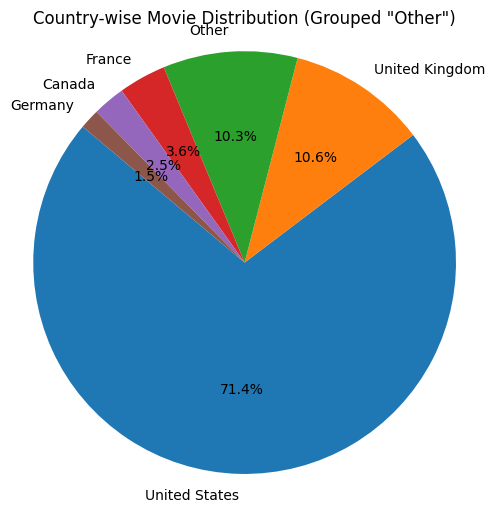

In [ ]:
# Group countries with low count into 'Other'
threshold = 100  # Adjust threshold based on your dataset's distribution
other = df['country'].value_counts()[df['country'].value_counts() < threshold]
df['country'] = df['country'].replace(other.index, 'Other')

# Recalculate the country counts
country_counts = df['country'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Country-wise Movie Distribution (Grouped "Other")')
plt.axis('equal')
plt.show()


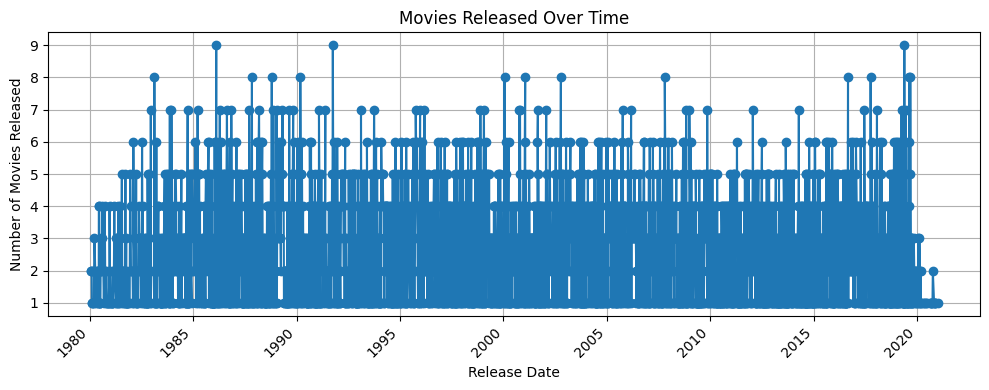

In [ ]:
# Extract release date and convert it to datetime
df['release_date'] = pd.to_datetime(df['released'].str.extract(r'(\w+\s\d{1,2},\s\d{4})')[0], format='%B %d, %Y')

# Group by the release date
daily_orders = df.groupby('release_date').size()

plt.figure(figsize=(10, 4))
daily_orders.plot(kind='line', marker='o', linestyle='-')
plt.title('Movies Released Over Time')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies Released')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


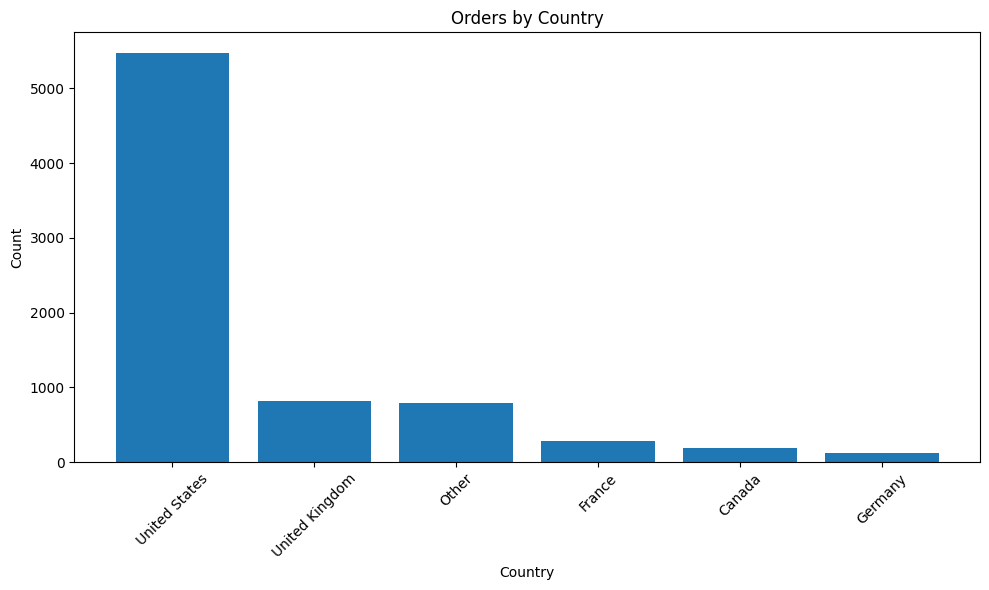

In [ ]:
city_counts = df['country'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(city_counts.index, city_counts.values)
plt.title('Orders by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.tight_layout()
plt.show()


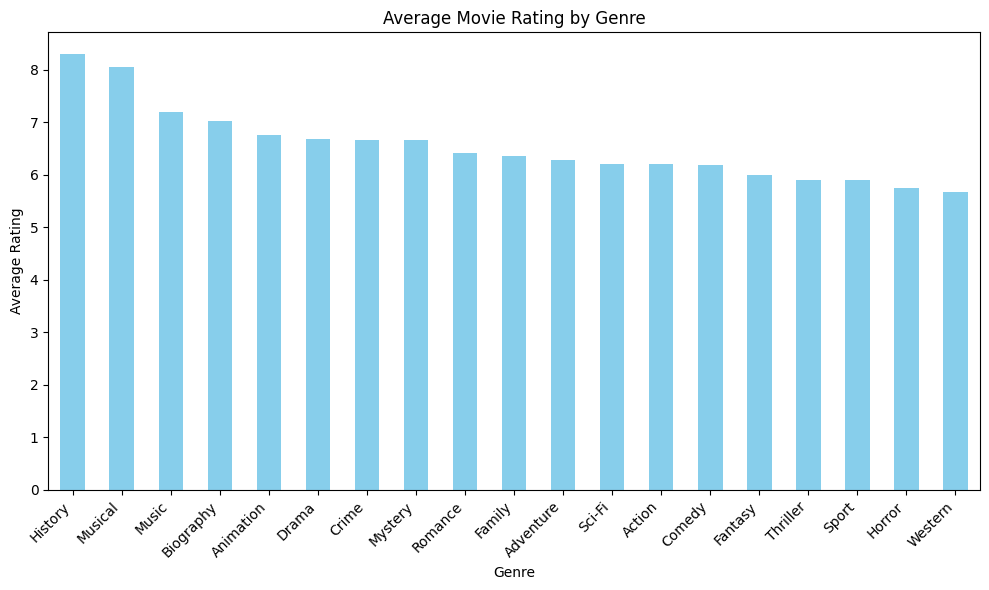

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by genre and calculate the average rating
avg_rating_by_genre = df.groupby('genre')['score'].mean()

# Sort by rating
avg_rating_by_genre = avg_rating_by_genre.sort_values(ascending=False)

# Plot the average rating by genre
plt.figure(figsize=(10, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
